<a href="https://colab.research.google.com/github/Chi36/Coffee/blob/main/Study_of_Catalysis_performance_during_dry_methane_reforming_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Study of catalysis performance during dry methane reforming with machine learning

An individual project on machine learning for the data science in chemical engineering (Fall 2024).
Name: Chimezie Frank ONWUDINJO

#Acknowledgement page

I write to acknowledge the support of all authors whose resources were consulted as well as the innovators of essential platforms instrumental to the accomplishing this capstone project.

Also worthy of my gratitude is the course instructor (Dr. Jude Okolie) whose relentless effort geared towards demystifying machine learning concepts.

My appreciation goes to the management of Bucknell University for incorporating this data science course into the chemical engineering program.
Thank you!

#Statement of AI Usage

I write to affirm that AI tools such as chatgpt and googlegemni were helpful tools especially for adjusting the codes and debugging with relevant prompts.

**Data preprocessing**

Load dataset and display first few rows

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/Data DRM_Git.xlsx')

# Display the first few rows
print(df.head())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

**Data overview**

In [2]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Catalyst                    1714 non-null   object 
 1   Ratio of CH4 in Feed        1714 non-null   float64
 2   Reaction Temperature        1714 non-null   int64  
 3   Ni Loading                  1714 non-null   float64
 4   Reaction Time               1714 non-null   float64
 5   Pore Size                   1714 non-null   float64
 6   Pore Volume                 1714 non-null   float64
 7   Surface Area                1714 non-null   float64
 8   H2-TPR Peak Temperature     1714 non-null   float64
 9   Ni Particle Size            1714 non-null   float64
 10  Ni Dispersion               658 non-null    float64
 11  Modifier Electronegativity  1714 non-null   float64
 12  GHSV                        1714 non-null   int64  
 13  CH4 Conversion              1665 

**Summary statistics**

In [3]:
# Summary statistics
print(df.describe())

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

**Check for missing values**

In [4]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_excel('/content/Data DRM_Git.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
has_missing_values = df.isnull().any().any()
print("Has missing values:", has_missing_values)

Missing values per column:
Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
Paper no.                        0
dtype: int64
Has missing values: True


**Imputation for missing values**

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Load the data
df = pd.read_excel('/content/Data DRM_Git.xlsx')  # Replace with your actual file path

# Step 2: Identify numerical columns (exclude non-relevant columns like 'Unnamed: 0')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
numerical_columns = [col for col in numerical_columns if 'Unnamed' not in col]  # Remove 'Unnamed' columns
print("Numerical columns:", numerical_columns)  # Debugging: Check the numerical columns

# Step 3: Check if there are numerical columns
if len(numerical_columns) > 0:
    # Step 4: Impute missing values for numerical columns (using median for numerical columns)
    imputer_num = SimpleImputer(strategy='median')  # Using median for numerical columns

    # Ensure that we have valid numerical columns to impute
    df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

# Step 5: Verify the imputation for numerical columns
print("\nAfter numerical imputation, missing data summary:")
print(df.isnull().sum())  # Check if there are still any missing values

# Step 6: Save the cleaned dataset (optional)
df.to_excel('cleaned_data_no_missing_values_numerical.xlsx', index=False)  # Save the cleaned dataset to a new Excel file


Numerical columns: ['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio']

After numerical imputation, missing data summary:
Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
Paper no.                     0
dtype: int64


**Recheck for missing values**

In [6]:
import pandas as pd
import numpy as np

# df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Generate synthetic data for missing numerical values
for col in numerical_columns:
    # Get the column data
    data = df[col]

    # If the column has missing values, generate synthetic data for them
    if data.isnull().sum() > 0:
        # Option 1: Generate synthetic data based on the normal distribution using the column's mean and std
        mean = data.mean()
        std = data.std()

        # Create synthetic data for missing values (assuming normal distribution)
        synthetic_data = np.random.normal(loc=mean, scale=std, size=data.isnull().sum())

        # Replace the missing values with the synthetic data
        df[col] = data.fillna(pd.Series(synthetic_data, index=data.index[data.isnull()]))

        print(f"Synthetic data generated and missing values filled for column: {col}")

# Step 3: Verify the result
print(f"Data shape after imputation: {df.shape}")
print(f"Missing values after imputation:\n{df.isnull().sum()}")

# Optional: Save the DataFrame to a new Excel file
df.to_excel('synthetic_data_filled.xlsx', index=False)




Data shape after imputation: (1714, 17)
Missing values after imputation:
Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
Paper no.                     0
dtype: int64


**Check for outliers**

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Step 1: Identify numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Function to detect outliers using Z-score
def detect_outliers_zscore(df, columns, threshold=3):
    outliers = pd.DataFrame()  # Initialize an empty DataFrame to store outlier information
    for col in columns:
        # Calculate the Z-score for the column
        z_scores = stats.zscore(df[col].dropna())  # Drop NaN values before calculating z-score
        # Identify outliers: If Z-score > threshold, consider it an outlier
        outlier_idx = np.where(np.abs(z_scores) > threshold)[0]
        if len(outlier_idx) > 0:
            outliers[col] = df.iloc[outlier_idx][col]
    return outliers

# Step 3: Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()  # Initialize an empty DataFrame to store outlier information
    for col in columns:
        # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers: If data is below lower bound or above upper bound, it's an outlier
        outlier_idx = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        if len(outlier_idx) > 0:
            outliers[col] = df.loc[outlier_idx, col]
    return outliers

# Step 4: Detect outliers using Z-score
zscore_outliers = detect_outliers_zscore(df, numerical_columns)

# Step 5: Detect outliers using IQR
iqr_outliers = detect_outliers_iqr(df, numerical_columns)

# Step 6: Print outliers detected by both methods
print("Outliers detected using Z-score method:")
print(zscore_outliers)

print("\nOutliers detected using IQR method:")
print(iqr_outliers)

# Optionally, you can save the outliers to an Excel file:
# zscore_outliers.to_excel('zscore_outliers.xlsx', index=False)
# iqr_outliers.to_excel('iqr_outliers.xlsx', index=False)


Outliers detected using Z-score method:
      Reaction Temperature  Ni Loading  Reaction Time  Pore Size  Pore Volume  \
193                  400.0         NaN            NaN        NaN          NaN   
194                  400.0         NaN            NaN        NaN          NaN   
195                  400.0         NaN            NaN        NaN          NaN   
196                  400.0         NaN            NaN        NaN          NaN   
342                  400.0         NaN            NaN        NaN          NaN   
343                  400.0         NaN            NaN        NaN          NaN   
344                  400.0         NaN            NaN        NaN          NaN   
345                  400.0         NaN            NaN        NaN          NaN   
763                  400.0         NaN            NaN        NaN          NaN   
764                  400.0         NaN            NaN        NaN          NaN   
765                  400.0         NaN            NaN        NaN     

**Box plot for each variable**

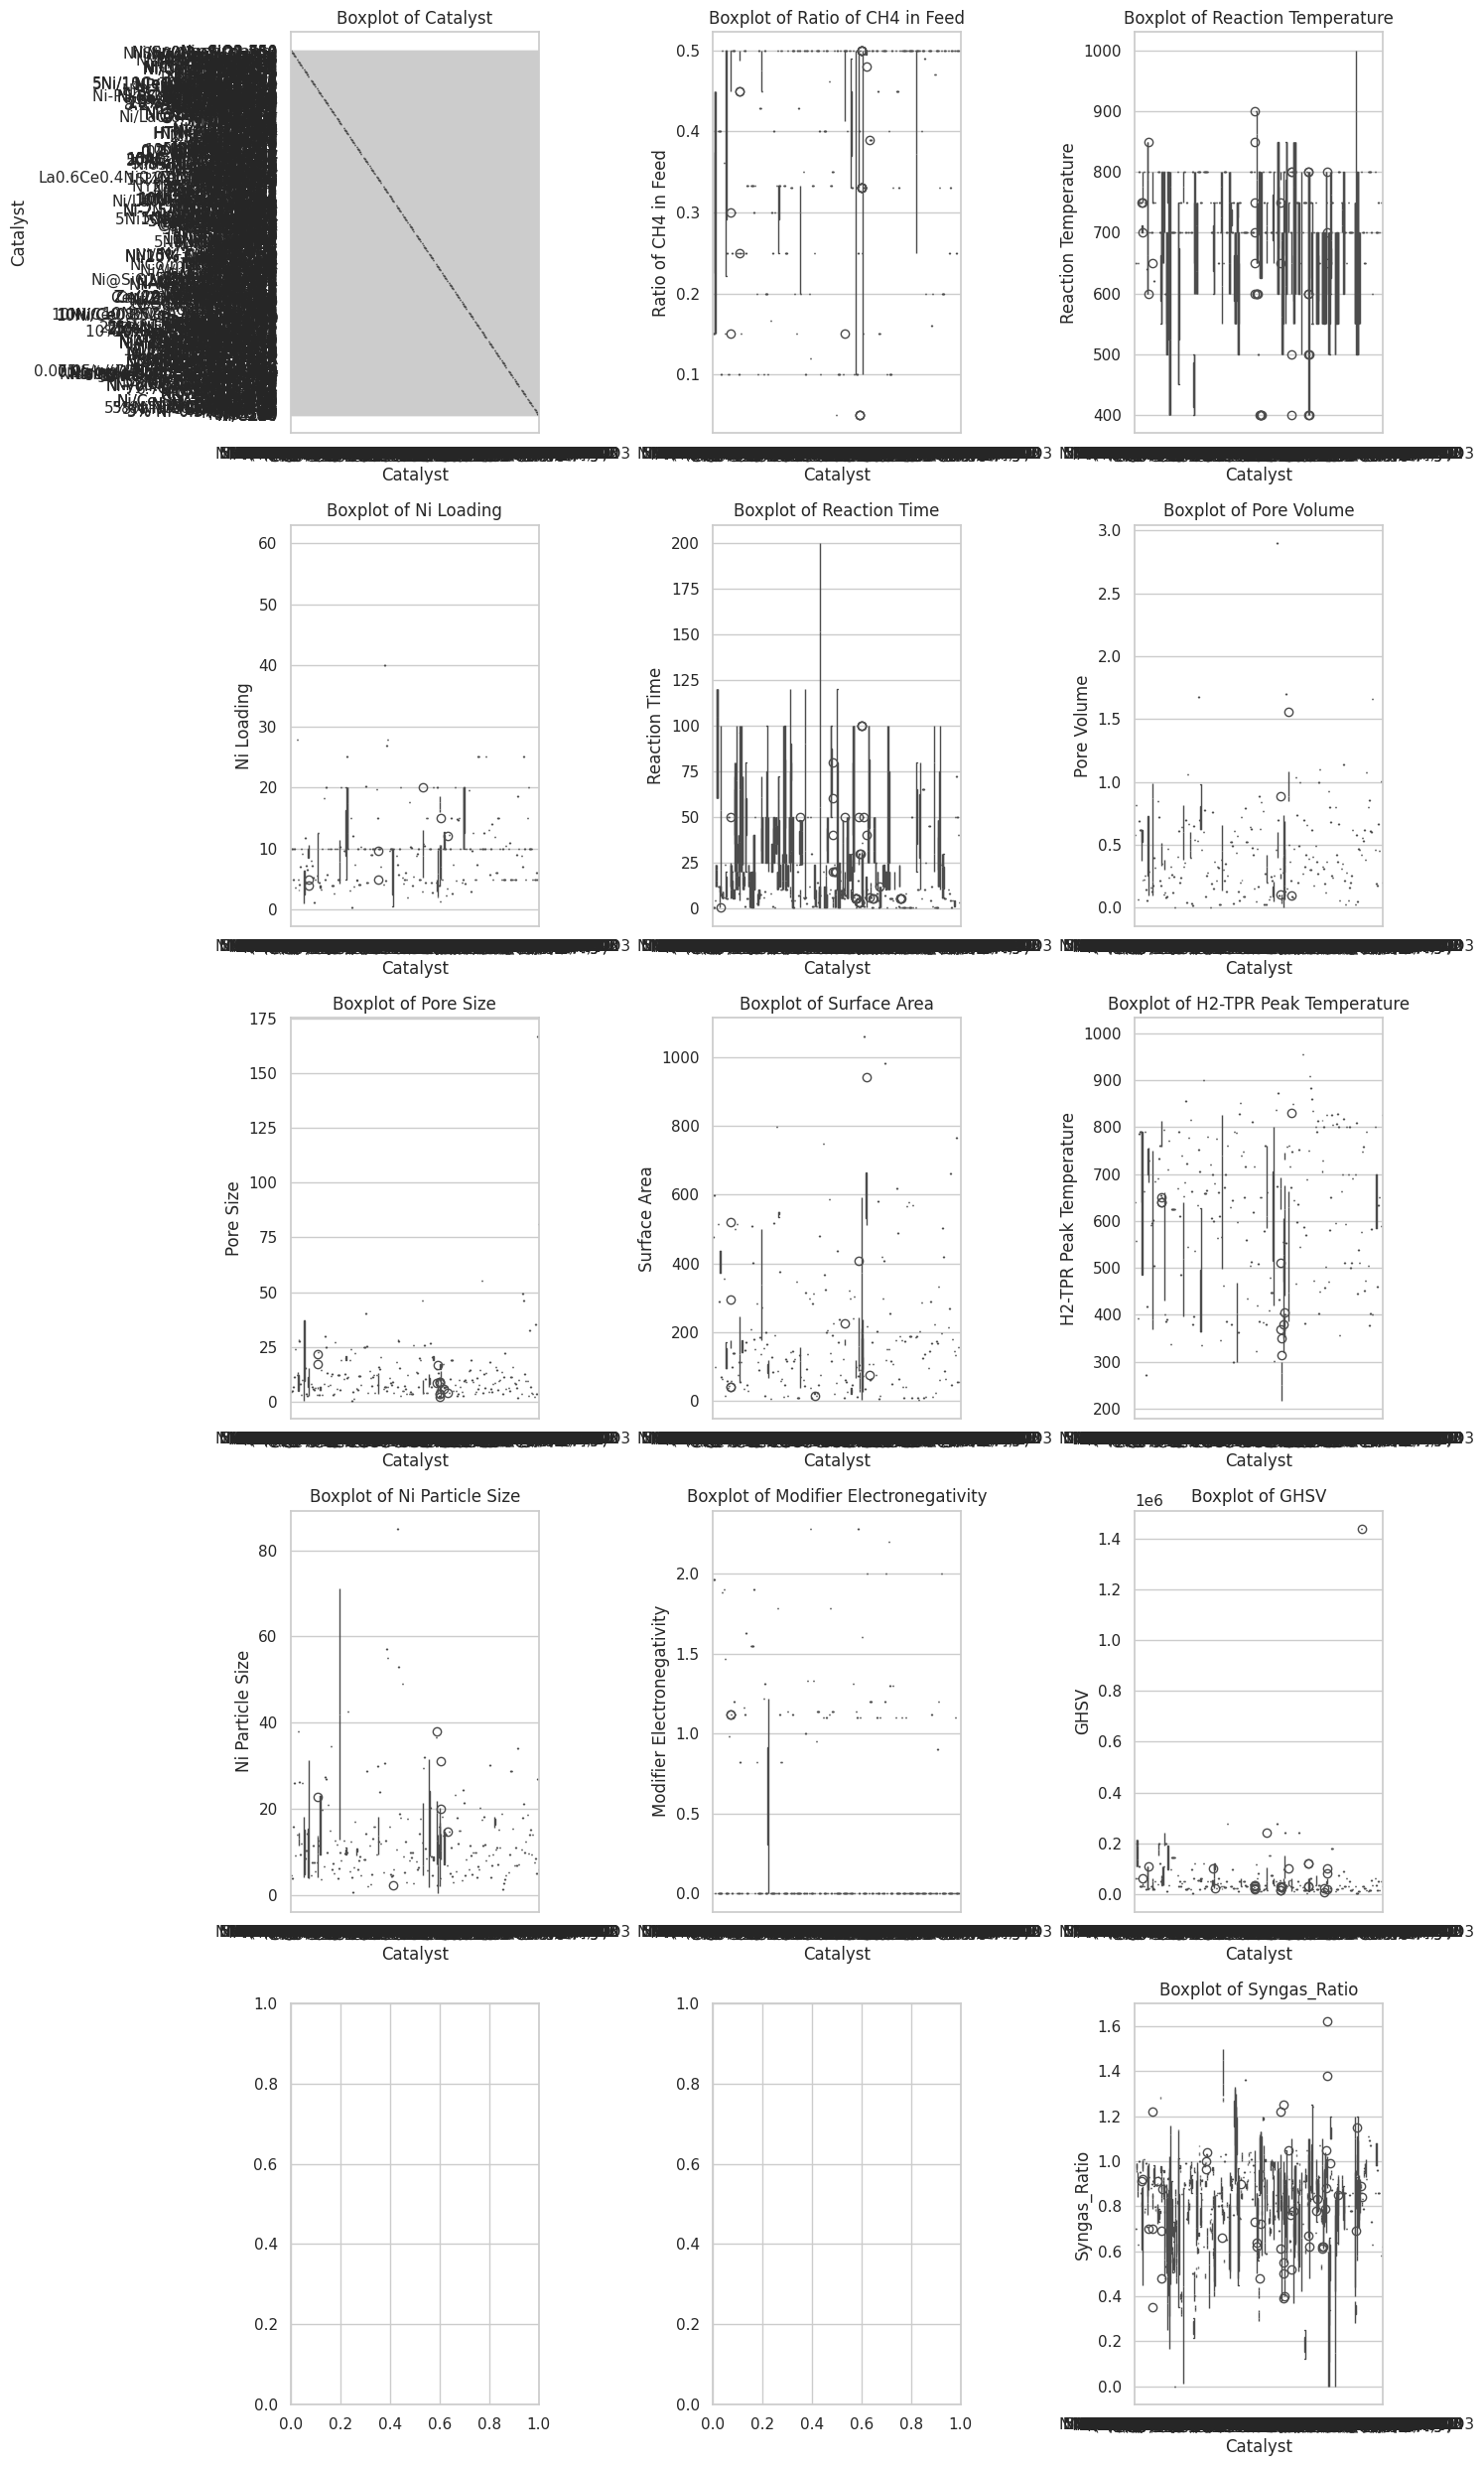

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Ensure column names are clean and consistent (remove extra spaces, lowercase)
df.columns = df.columns.str.strip()  # Strip leading/trailing spaces from column names

# Define the list of chemical components for plotting
columns_to_plot = [
    'Catalyst',
    'Ratio of CH4 in Feed',
    'Reaction Temperature',
    'Ni Loading',
    'Reaction Time',
    'Pore Volume',
    'Pore Size',
    'Surface Area',
    'H2-TPR Peak Temperature',
    'Ni Particle Size',
    'Modifier Electronegativity',
    'GHSV',
    'CH4 conversion',
    'CO2 conversion',
    'Syngas_Ratio'
]

# Box plots to show the distribution of chemical components by 'Catalyst Preparation Method'
sns.set_theme(style="whitegrid")

# Step 1: Adjust the number of rows and columns dynamically based on the number of variables to plot
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots with dynamic rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Step 2: Loop over the columns to create box plots
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, x='Catalyst', y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('Catalyst')
        axes[i].set_ylabel(f'{col}')
    else:
        print(f"Warning: '{col}' not found in DataFrame columns")

# Hide any unused axes if there are more subplots than columns to plot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()






**Check for categorical variables**

In [9]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature          float64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                          float64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
Paper no.                      object
dtype: object

Numeric columns: Index(['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading',
       'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area',
       'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion',
       'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dty

**Heatmaps**

Remove categorical variables before plotting heatmaps


Numerical DataFrame (Categorical Variables Removed):
   Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                  0.15                   650        10.0            0.5   
1                  0.15                   650        10.0            0.5   
2                  0.15                   650        10.0            0.5   
3                  0.15                   650        10.0            0.5   
4                  0.15                   650        10.0            0.5   

   Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
0        4.7         0.58         476.0                    640.0   
1        4.7         0.58         476.0                    640.0   
2        5.2         0.58         455.0                    457.0   
3        5.2         0.58         455.0                    457.0   
4        4.8         0.82         599.0                    558.0   

   Ni Particle Size  Ni Dispersion  Modifier Electronegativity   GHSV  \
0      

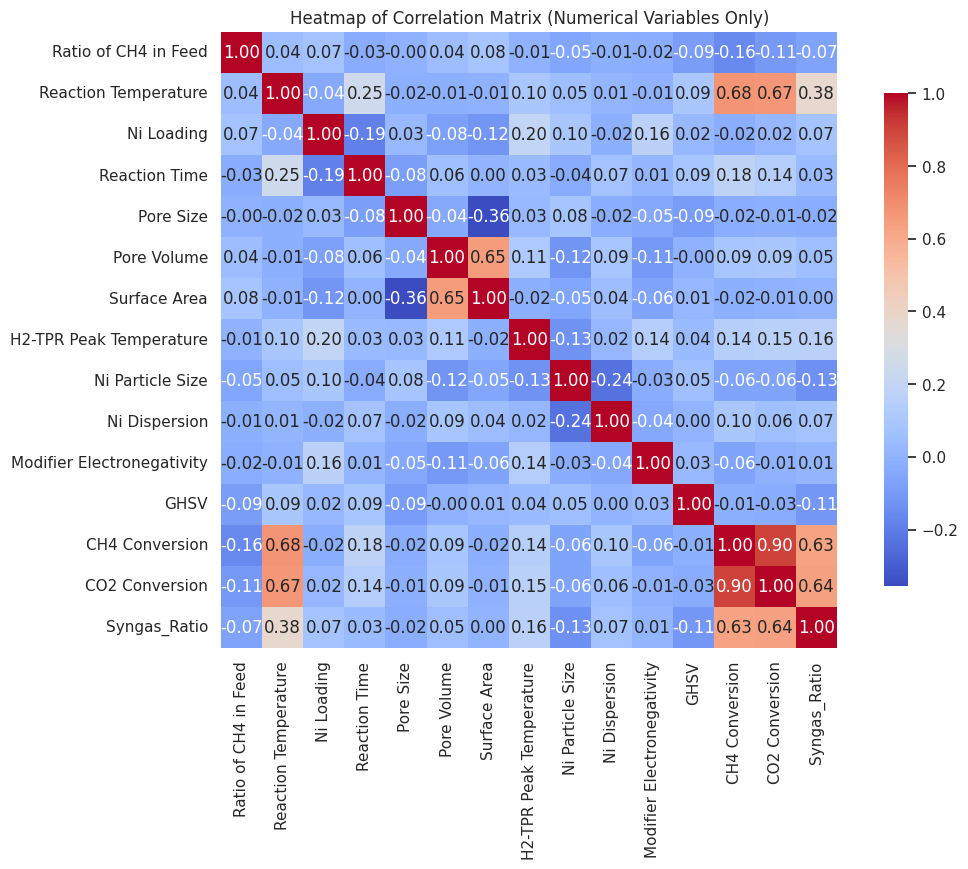

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove categorical variables
data_numerical = data.select_dtypes(include=['float64', 'int64'])

# Display the numerical DataFrame
print("\nNumerical DataFrame (Categorical Variables Removed):")
print(data_numerical.head())

# Calculate the correlation matrix
correlation_matrix = data_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate cells with correlation coefficients
    fmt=".2f",            # Format for the annotation
    cmap='coolwarm',      # Color map for the heatmap
    square=True,          # Make cells square-shaped
    cbar_kws={"shrink": .8}  # Adjust color bar size
)

plt.title('Heatmap of Correlation Matrix (Numerical Variables Only)')
plt.show()

#Feature Engineering

Splitting dataset into features and targets

Target =  Syngas Ratio

> Add blockquote



In [11]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Assuming 'target_variable' is the column you want to predict
target_variable = 'Syngas_Ratio'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

print("Features (X):")
print(X.head())

print("Target Variable (y):")
print(y.head())

Features (X):
             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            8.9   
1                    640

**Histograms of target vs features**

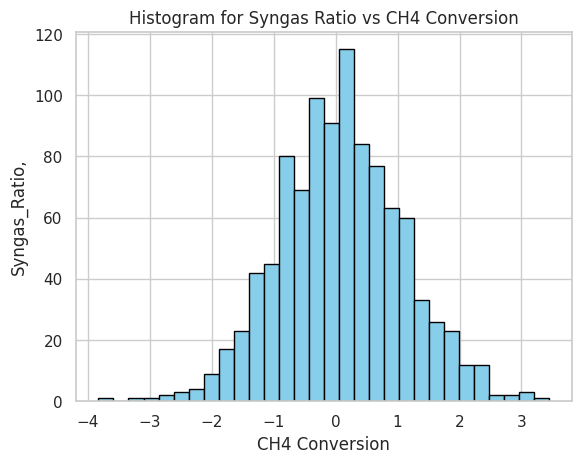

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('CH4 Conversion')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas Ratio vs CH4 Conversion')

# Display the plot
plt.show()


Histogram for Syngas_Ratio vs CO2 Conversion

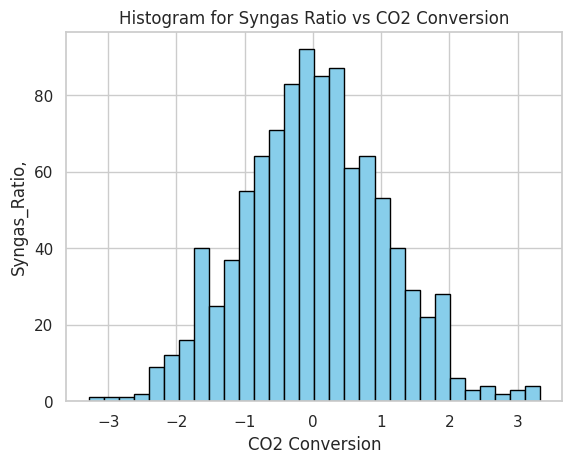

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('CO2 Conversion')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas Ratio vs CO2 Conversion')

# Display the plot
plt.show()

Histogram for 'Syngas_Ratio vs 'Reaction Temperature'



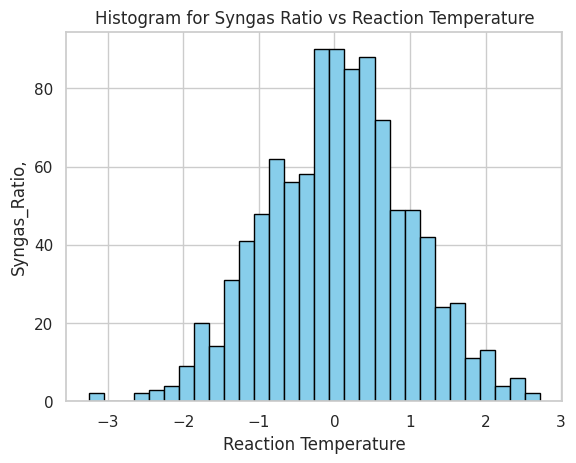

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Reaction Temperature')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas Ratio vs Reaction Temperature')

# Display the plot
plt.show()

Histogram for 'Syngas_Ratio' vs 'Ni Loading'

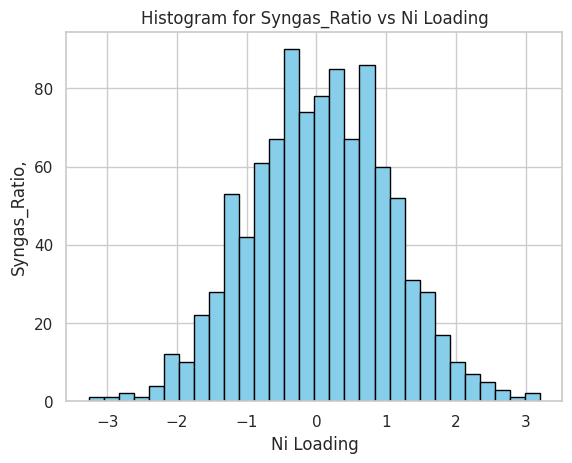

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ni Loading')
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas_Ratio vs Ni Loading')

# Display the plot
plt.show()

Histogram for Syngas_Ratio vs Surface Area



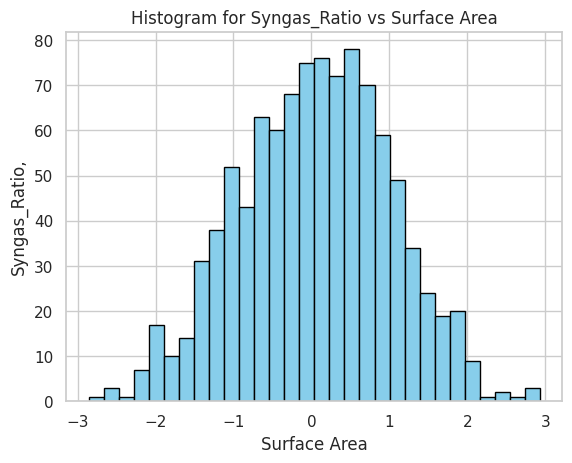

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')


# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Surface Area')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas_Ratio vs Surface Area')

# Display the plot
plt.show()

#Selection of appropriate and suitable Machine Learning Model

**Training of datasets and evaluation of models**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# List of feature columns and target variable
features = ['Ni Loading', 'Surface Area', 'GHSV', 'CO2 Conversion', 'CH4 Conversion', 'Reaction Temperature']
target_variable = 'Syngas_Ratio'  # The column we are predicting

# Fill NaN values with the mean of each column (features + target column)
df[features + [target_variable]] = df[features + [target_variable]].fillna(df.mean())

# Prepare the feature set (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Dictionary to hold the performance results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE) for model evaluation
    mae = mean_absolute_error(y_test, predictions)

    # Store the result in the dictionary
    results[name] = mae

    # Print the result for this model
    print(f"{name}: Mean Absolute Error = {mae:.4f}")

# Identify the best model (the model with the lowest MAE)
best_model_name = min(results, key=results.get)
best_model_mae = results[best_model_name]

# Output the best model and its performance
print(f"\nBest Model: {best_model_name} with MAE = {best_model_mae:.4f}")



Linear Regression: Mean Absolute Error = 0.0899
Random Forest: Mean Absolute Error = 0.0571
Support Vector Regressor: Mean Absolute Error = 0.1193
K-Neighbors Regressor: Mean Absolute Error = 0.0624
Decision Tree Regressor: Mean Absolute Error = 0.0746

Best Model: Random Forest with MAE = 0.0571


**Cross Validation**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s

Linear Regression Best Parameters: {}
Mean Absolute Error: 0.0899
R^2 Score: 0.4132
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s

Random Forest Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Mean Absolute Error: 0.0570
R^2 Score: 0.7339
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Support Vector Regressor Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Mean Absolute Error: 0.1193
R^2 Score: 0.0580
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s

K-Neighbors Regressor Best Parameters: {'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'auto'}
Mean Absolute Error: 0.0634
R^2 Score: 0.7086
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

Decision Tree Regressor Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


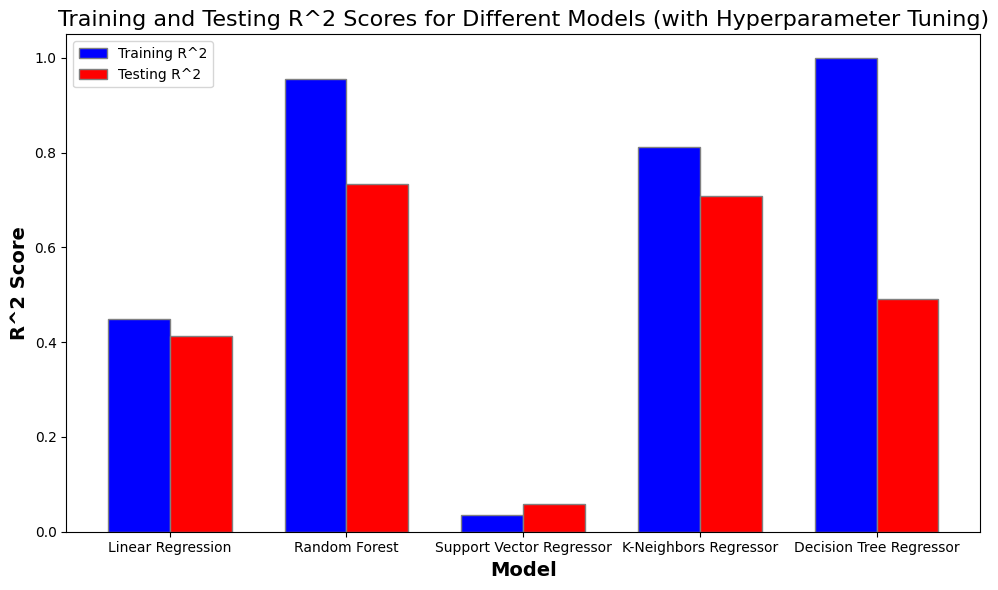

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint, uniform

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# List of feature columns and target variable
features = ['Ni Loading', 'Surface Area', 'GHSV', 'CO2 Conversion', 'CH4 Conversion', 'Reaction Temperature']
target_variable = 'Syngas_Ratio'  # The column we are predicting

# Fill NaN values with the mean of each column (features + target column)
df[features + [target_variable]] = df[features + [target_variable]].fillna(df.mean())

# Prepare the feature set (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Hyperparameter grids for tuning (reduced ranges for faster search)
param_grids = {
    "Linear Regression": {},
    "Random Forest": {
        'n_estimators': [50],  # Reduce the number of estimators
        'max_depth': [None],  # Simplify hyperparameter space
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    "Support Vector Regressor": {
        'C': [1],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    "K-Neighbors Regressor": {
        'n_neighbors': [3],
        'weights': ['uniform'],
        'algorithm': ['auto']
    },
    "Decision Tree Regressor": {
        'max_depth': [None],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }
}

# Dictionaries to hold the best parameters and the best model
best_models = {}
best_params = {}

# Train and tune each model with RandomizedSearchCV (faster alternative to GridSearchCV)
for name, model in models.items():
    # Set up RandomizedSearchCV (with reduced iterations and fewer parameters)
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name],
                                       n_iter=5, cv=3, scoring='neg_mean_absolute_error',
                                       n_jobs=1, random_state=42, verbose=2)  # Use only 1 job

    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_models[name] = random_search.best_estimator_
    best_params[name] = random_search.best_params_

    # Evaluate the best model on the test data
    best_model = best_models[name]
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f"\n{name} Best Parameters: {best_params[name]}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")

# Visualize the results of R^2 Scores for different models
train_r2_scores = {}
test_r2_scores = {}

for name, model in best_models.items():
    # Calculate R^2 score for training and testing data
    train_r2_scores[name] = model.score(X_train, y_train)
    test_r2_scores[name] = model.score(X_test, y_test)

# Plotting the R^2 scores for training and testing
labels = list(models.keys())  # Model names

# Bar width
bar_width = 0.35

# X axis positions for the bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot training R^2 scores
plt.bar(r1, train_r2_scores.values(), color='b', width=bar_width, edgecolor='grey', label='Training R^2')

# Plot testing R^2 scores
plt.bar(r2, test_r2_scores.values(), color='r', width=bar_width, edgecolor='grey', label='Testing R^2')

# Add labels and title
plt.xlabel('Model', fontweight='bold', fontsize=14)
plt.ylabel('R^2 Score', fontweight='bold', fontsize=14)
plt.title('Training and Testing R^2 Scores for Different Models (with Hyperparameter Tuning)', fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Display a plot of training and testing
𝑅^2 scores for different models

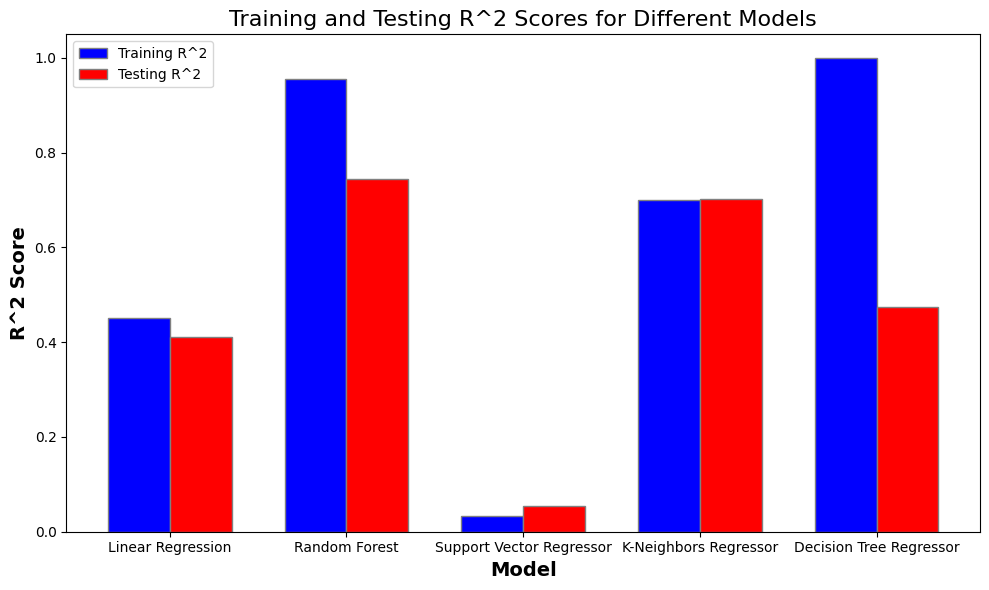

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# List of feature columns and target variable
features = ['Ni Loading', 'Surface Area', 'GHSV', 'CO2 Conversion', 'CH4 Conversion', 'Reaction Temperature']
target_variable = 'Syngas_Ratio'  # The column we are predicting

# Fill NaN values with the mean of each column (features + target column)
df[features + [target_variable]] = df[features + [target_variable]].fillna(df.mean())

# Prepare the feature set (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Dictionaries to hold the R^2 scores
train_r2_scores = {}
test_r2_scores = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate R^2 score for training and testing data
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    # Store the R^2 scores
    train_r2_scores[name] = train_r2
    test_r2_scores[name] = test_r2

# Plotting the R^2 scores for training and testing
labels = list(models.keys())  # Model names

# Bar width
bar_width = 0.35

# X axis positions for the bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot training R^2 scores
plt.bar(r1, train_r2_scores.values(), color='b', width=bar_width, edgecolor='grey', label='Training R^2')

# Plot testing R^2 scores
plt.bar(r2, test_r2_scores.values(), color='r', width=bar_width, edgecolor='grey', label='Testing R^2')

# Add labels and title
plt.xlabel('Model', fontweight='bold', fontsize=14)
plt.ylabel('R^2 Score', fontweight='bold', fontsize=14)
plt.title('Training and Testing R^2 Scores for Different Models', fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#Hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
Training R^2: 0.8731
Testing R^2: 0.6949
Mean Absolute Error (MAE): 0.0695


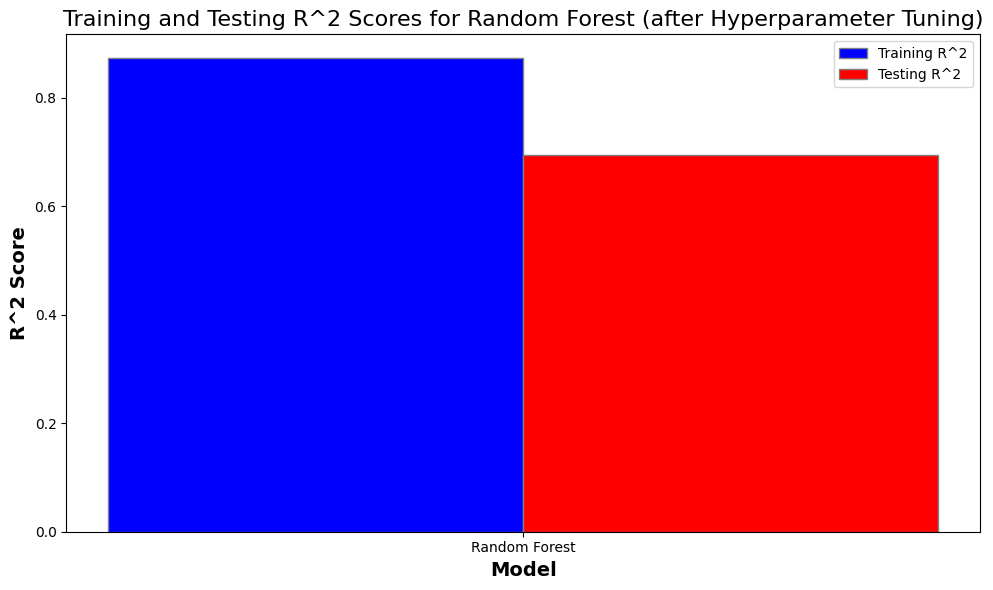

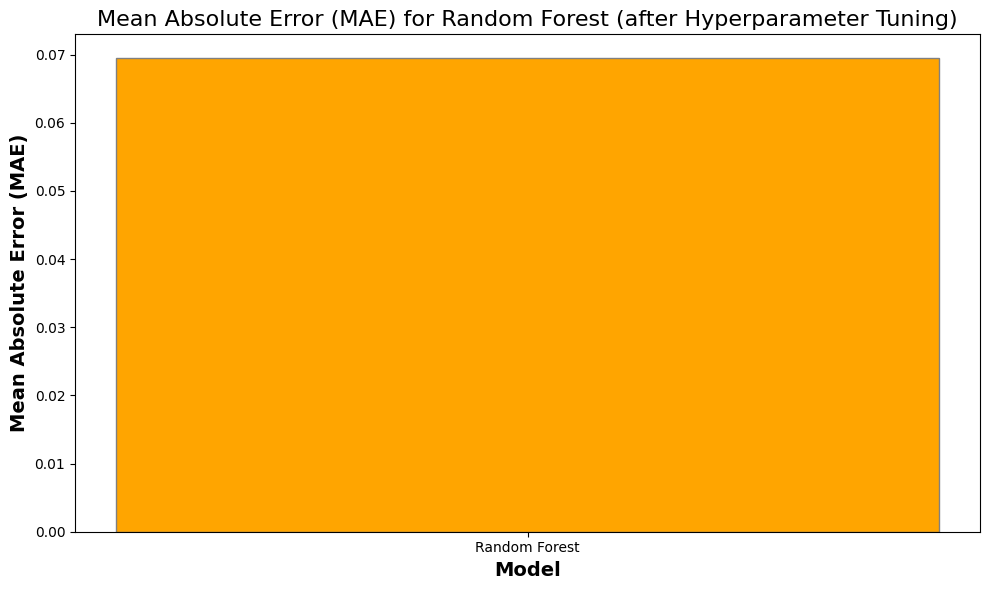

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import shuffle

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path as necessary

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# List of feature columns and target variable
features = ['Ni Loading', 'Surface Area', 'GHSV', 'CO2 Conversion', 'CH4 Conversion', 'Reaction Temperature']
target_variable = 'Syngas_Ratio'

# Fill NaN values with the mean of each column (features + target column)
df[features + [target_variable]] = df[features + [target_variable]].fillna(df.mean())

# Shuffle the data to ensure no order bias
df = shuffle(df, random_state=42)

# Prepare the feature set (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best hyperparameters
print(f"Best Parameters: {random_search.best_params_}")

# Make predictions using the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate performance metrics for Random Forest
train_r2_score = r2_score(y_train, y_pred_train)
test_r2_score = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation results for Random Forest
print(f"Training R^2: {train_r2_score:.4f}")
print(f"Testing R^2: {test_r2_score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualization: Plotting R^2 Scores for Training and Testing
labels = ['Random Forest']  # Model names
bar_width = 0.35  # Width of bars

# X axis positions for the bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Plotting the R^2 scores
plt.figure(figsize=(10, 6))

# Plot training R^2 scores
plt.bar(r1, [train_r2_score], color='b', width=bar_width, edgecolor='grey', label='Training R^2')

# Plot testing R^2 scores
plt.bar(r2, [test_r2_score], color='r', width=bar_width, edgecolor='grey', label='Testing R^2')

# Add labels and title
plt.xlabel('Model', fontweight='bold', fontsize=14)
plt.ylabel('R^2 Score', fontweight='bold', fontsize=14)
plt.title('Training and Testing R^2 Scores for Random Forest (after Hyperparameter Tuning)', fontsize=16)
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Visualization: Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))

# Plot MAE for Random Forest
plt.bar(labels, [mae], color='orange', edgecolor='grey')

# Add labels and title for MAE
plt.xlabel('Model', fontweight='bold', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontweight='bold', fontsize=14)
plt.title('Mean Absolute Error (MAE) for Random Forest (after Hyperparameter Tuning)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


**Contour Plot of the optimized hyperparameter**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint

# Load your dataset
try:
    df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path as necessary
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# Check the dataframe info and ensure the target variable exists
print(df.info())
target_variable = 'Syngas_Ratio'

if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataframe.")

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# Define features (X) and target variable (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Replace missing values with the mean of each column in the feature set
X = X.fillna(X.mean())

# Replace missing values in the target variable with the mean of the target column
y = y.fillna(y.mean())

# Check if there are any remaining missing values
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("There are still missing values in the dataset after imputation.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
model = RandomForestRegressor(random_state=42)

# Define the parameter search space
param_dist = {
    'n_estimators': randint(50, 200),  # Range for n_estimators
    'min_samples_split': randint(2, 10),  # Range for min_samples_split
    'min_samples_leaf': randint(1, 10),  # Range for min_samples_leaf
    'max_depth': [None] + list(range(5, 21)),  # Range for max_depth
    'bootstrap': [True, False]  # Bootstrap option for sampling
}

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=30, cv=5,
                                   scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)

try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")
    exit()

# Extract the results
results = random_search.cv_results_

# Create a grid for the contour plot
try:
    # Extract n_estimators, min_samples_split, and mean test scores (converted from negative MAE)
    n_estimators = results['param_n_estimators'].data
    min_samples_split = results['param_min_samples_split'].data
    mean_test_scores = -results['mean_test_score']  # Convert from negative MAE

    # Create unique values for n_estimators and min_samples_split
    n_estimators_unique = np.unique(n_estimators)
    min_samples_split_unique = np.unique(min_samples_split)

    # Reshape the mean test scores into a 2D array for the contour plot
    mean_test_scores_reshaped = mean_test_scores.reshape(len(n_estimators_unique), len(min_samples_split_unique))

    # Create the contour plot
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(min_samples_split_unique, n_estimators_unique, mean_test_scores_reshaped, levels=20, cmap='viridis')
    plt.colorbar(cp)
    plt.title('Contour Plot of Mean Test MAE for Random Forest Hyperparameters (Randomized Search)')
    plt.xlabel('Min Samples Split')
    plt.ylabel('Number of Estimators')

    # Highlight the best parameters found
    best_params = random_search.best_params_
    plt.scatter(best_params['min_samples_split'], best_params['n_estimators'], color='red', marker='x', s=100, label='Best Params')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")
    exit()

# Output the best parameters and evaluation
best_params = random_search.best_params_
print(f"Best Parameters found by Randomized Search: {best_params}")

# Print the evaluation metrics for the optimized model
y_pred_train = random_search.predict(X_train)
y_pred_test = random_search.predict(X_test)

# Training R^2 and MAE
train_r2_score = random_search.score(X_train, y_train)
test_r2_score = random_search.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"Training R^2: {train_r2_score:.4f}")
print(f"Testing R^2: {test_r2_score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Catalyst                    1714 non-null   object 
 1   Ratio of CH4 in Feed        1714 non-null   float64
 2   Reaction Temperature        1714 non-null   int64  
 3   Ni Loading                  1714 non-null   float64
 4   Reaction Time               1714 non-null   float64
 5   Pore Size                   1714 non-null   float64
 6   Pore Volume                 1714 non-null   float64
 7   Surface Area                1714 non-null   float64
 8   H2-TPR Peak Temperature     1714 non-null   float64
 9   Ni Particle Size            1714 non-null   float64
 10  Ni Dispersion               1714 non-null   float64
 11  Modifier Electronegativity  1714 non-null   float64
 12  GHSV                        1714 non-null   int64  
 13  CH4 Conversion              1714 

#Interpretable Analysis

Using partial dependence plots (PDP) such as one-way variable and two-way PDP

- One-way partial dependence plots
- Two-way partial dependence plots



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Catalyst                    1714 non-null   object 
 1   Ratio of CH4 in Feed        1714 non-null   float64
 2   Reaction Temperature        1714 non-null   int64  
 3   Ni Loading                  1714 non-null   float64
 4   Reaction Time               1714 non-null   float64
 5   Pore Size                   1714 non-null   float64
 6   Pore Volume                 1714 non-null   float64
 7   Surface Area                1714 non-null   float64
 8   H2-TPR Peak Temperature     1714 non-null   float64
 9   Ni Particle Size            1714 non-null   float64
 10  Ni Dispersion               1714 non-null   float64
 11  Modifier Electronegativity  1714 non-null   float64
 12  GHSV                        1714 non-null   int64  
 13  CH4 Conversion              1714 

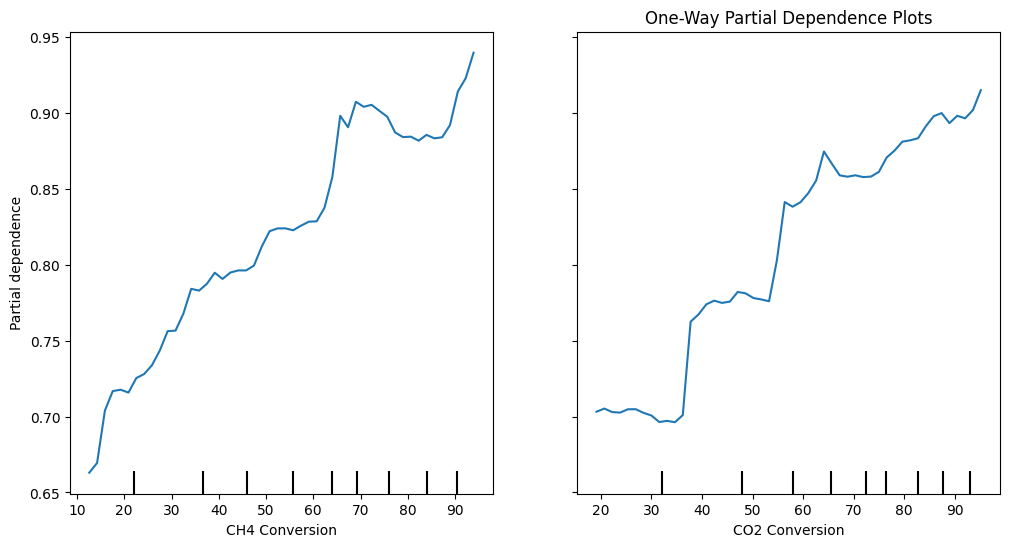

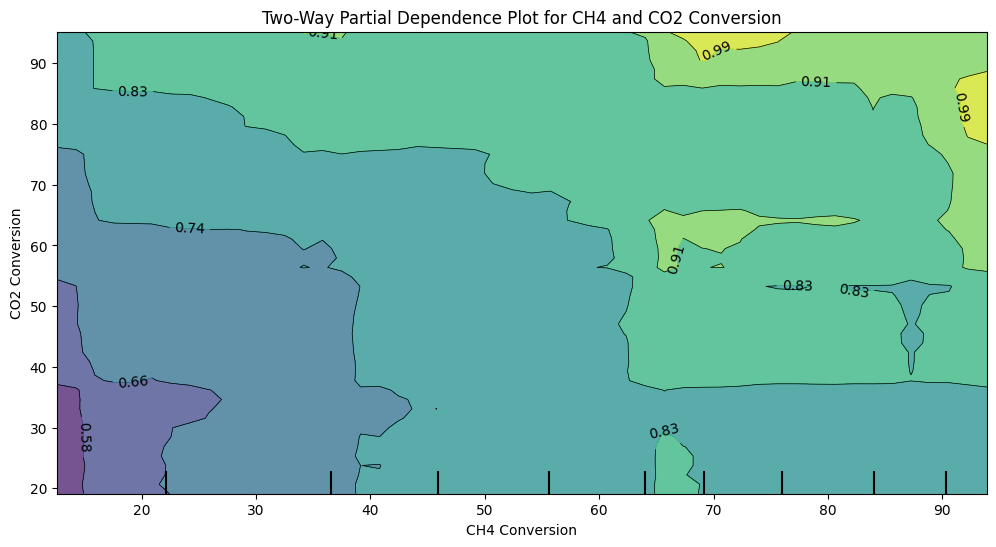

In [2]:
# Install specific versions of libraries to avoid conflicts
!pip install pandas==2.2.2 numpy==1.23.5 matplotlib seaborn scikit-learn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import randint

# Load your dataset
try:
    df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path if necessary
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# Check the dataframe info and ensure the target variable exists
print(df.info())
target_variable = 'Syngas_Ratio'  # Change to the actual target column

if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataframe.")

# Remove the first and last columns
df = df.drop([df.columns[0], df.columns[-1]], axis=1)

# Define features (X) and target variable (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Replace missing values with the mean of each column
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Check if there are any remaining missing values
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("There are still missing values in the dataset after imputation.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_depth': [None] + list(range(5, 21)),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=30, cv=5,
                                   scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)

# Fit the model using RandomizedSearchCV
try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")
    exit()

# Output the best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Refit the best model with the optimal parameters
best_rf_model = random_search.best_estimator_

# One-way Partial Dependence Plot for feature importance
features_one_way = ['CH4 Conversion', 'CO2 Conversion']  # Example features

# Check if features exist in the DataFrame
for feature in features_one_way:
    if feature not in X.columns:
        raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

# Create and display the Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=features_one_way, ax=ax, grid_resolution=50)
plt.title('One-Way Partial Dependence Plots')
plt.show()

# You can optionally plot more features or use a two-way Partial Dependence Plot
features_two_way = [('CH4 Conversion', 'CO2 Conversion')]  # Example of a 2D PDP

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=features_two_way, ax=ax, grid_resolution=50)
plt.title('Two-Way Partial Dependence Plot for CH4 and CO2 Conversion')
plt.show()


Bee-swarm plot

<ipython-input-2-9275b47e7f1f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

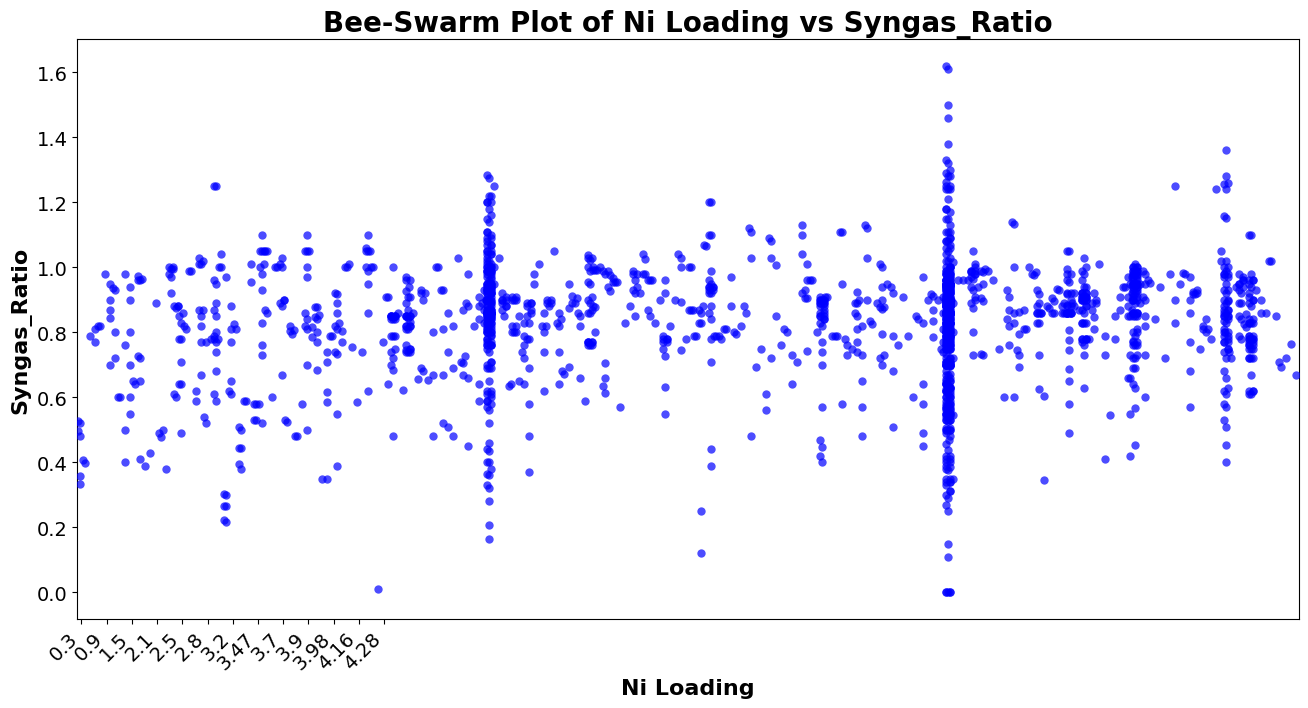

In [2]:
!pip install pandas==2.2.2 numpy==1.23.5 matplotlib seaborn scikit-learn openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path if necessary

# Define the target variable and feature
target_variable = 'Syngas_Ratio'  # Change to the actual target column name
feature = 'Ni Loading'  # Replace with the actual feature you want to analyze

# Check for missing values and replace with the mean (to avoid warnings)
df[feature].fillna(df[feature].mean(), inplace=True)

# Sort the data by the feature to ensure ascending order on x-axis
df = df.sort_values(by=feature)

# Create a fitting scale for the x-axis (adjust values to your desired range, e.g., from 0 to 40)
x_min, x_max = df[feature].min(), df[feature].max()

# Create the Bee-Swarm plot
plt.figure(figsize=(14, 8))  # Adjust the size of the plot for better readability
sns.swarmplot(x=feature, y=target_variable, data=df, alpha=0.7, color='b', size=6)

# Adjust font sizes for better legibility
plt.title(f'Bee-Swarm Plot of {feature} vs {target_variable}', fontsize=20, fontweight='bold')
plt.xlabel(feature, fontsize=16, fontweight='bold')
plt.ylabel(target_variable, fontsize=16, fontweight='bold')

# Set custom x-axis ticks with spacing
x_ticks = np.arange(x_min, x_max + 1, 5)  # Adjust the interval as needed
plt.xticks(ticks=x_ticks, fontsize=14, rotation=45, ha='right')  # Add rotation to avoid overlap

# Increase y-axis label size for readability
plt.yticks(fontsize=14)

# Adjust the layout to avoid overlapping elements
plt.tight_layout(pad=4.0)  # Added padding to prevent label cutoffs

# Display the plot
plt.show()


#Hugging face user interface

In [1]:
# Install specific versions of libraries to avoid conflicts
!pip install gradio pandas==2.2.2 numpy==1.23.5 matplotlib seaborn scikit-learn openpyxl

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle
import gradio as gr

# Load dataset
df = pd.read_excel("/content/cleaned_data_no_missing_values_numerical.xlsx")

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Set the desired columns as index, checking their existence first
required_columns = ['Reaction Temperature', 'CH4 Conversion', 'CO2 Conversion', 'GHSV', 'Surface Area', 'Ni Loading']
missing_columns = [col for col in required_columns if col not in df.columns]
if not missing_columns:
    df.set_index(required_columns, inplace=True)
else:
    raise KeyError(f"Missing required columns: {missing_columns}")

# Specify the output columns
output_columns = ['Syngas_Ratio']
missing_output_columns = [col for col in output_columns if col not in df.columns]
if missing_output_columns:
    raise KeyError(f"Missing output columns: {missing_output_columns}")

# Prepare the data
X = df.reset_index()  # Reset index to keep features as columns

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Fill any remaining NaN values with 0

# Separate target variables
y = X['Syngas_Ratio']

# Drop the target columns from the feature set
X = X.drop(columns=output_columns)

# Define models to be used
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
}

# Train models and select the best one
best_models = {}
for output_name, y in {'Syngas_Ratio': y}.items():
    best_score = -np.inf
    best_model = None
    for model_name, model in models.items():
        try:
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_model = (model_name, model)
        except Exception as e:
            print(f"Failed to train {model_name} for {output_name}: {e}")
    if best_model:
        model_name, model = best_model
        model.fit(X, y)
        with open(f'best_{model_name}_{output_name}.pkl', 'wb') as model_file:
            pickle.dump(model, model_file)
        best_models[output_name] = (model_name, model)

# Define Gradio app
def predict_catalyst_metrics(Reaction_Temperature, CO2_Conversion, CH4_Conversion, Ni_Loading, Surface_Area, GHSV):
    # Create input data for prediction
    input_data = pd.DataFrame({
        'Reaction Temperature': [Reaction_Temperature],
        'CO2 Conversion': [CO2_Conversion],
        'CH4 Conversion': [CH4_Conversion],
        'GHSV': [GHSV],
        'Surface Area': [Surface_Area],
        'Ni Loading': [Ni_Loading]
    })

    # Ensure the input data has the same structure as X
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    predictions = {}
    for output_name in ['Syngas_Ratio']:
        try:
            model_name, model = best_models[output_name]
            prediction = model.predict(input_data)[0]
            predictions[f'{model_name} - {output_name}'] = prediction
        except Exception as e:
            predictions[f'{output_name}'] = f"Error: {e}"
    return predictions

# Gradio Interface
inputs = [
    gr.Number(label='Reaction Temperature', value=0),  # Removed 'variable' argument
    gr.Number(label='CO2 Conversion', value=0),  # Removed 'variable' argument
    gr.Number(label='CH4 Conversion', value=0),  # Removed 'variable' argument
    gr.Number(label='Surface Area', value=0),  # Removed 'variable' argument
    gr.Number(label='Ni Loading', value=0),  # Removed 'variable' argument
    gr.Number(label='GHSV', value=0),  # Removed 'variable' argument
]

outputs = gr.JSON()

app = gr.Interface(fn=predict_catalyst_metrics, inputs=inputs, outputs=outputs, title='Catalyst Performance Prediction during Dry Reforming of Methane')

if __name__ == "__main__":
    app.launch()


Columns in the DataFrame: ['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio', 'Paper no.']
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fbae1bc442ea7945aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Ethical checklist with Deon

In [ ]:
!pip install deon

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for deon: filename=deon-0.3.0-py3-none-any.whl size=21350 sha256=c5057ebbdf3a2bbe0a8464e46d8b8920f105a505c67932066f9cb1a2843b6222
  Stored in directory: /root/.cache/pip/wheels/65/8e/b0/6215389003a488515cb8287265bc54506a636bbf043d79c2b8
Successfully built deon


Check available commands

In [ ]:
!deon --help

Usage: deon [OPTIONS]

  Easily create an ethics checklist for your data science project.

  The checklist will be printed to standard output by default. Use the
  --output option to write to a file instead.

Options:
  -l, --checklist PATH  Override default checklist file with a path to a
                        custom checklist.yml file.
  -f, --format TEXT     Output format. Default is "markdown". Can be one of
                        [ascii, html, jupyter, markdown, rmarkdown, rst].
                        Ignored and file extension used if --output is passed.
  -o, --output PATH     Output file path. Extension can be one of [.txt,
                        .html, .ipynb, .md, .rmd, .rst]. The checklist is
                        appended if the file exists.
  -w, --overwrite       Overwrite output file if it exists. Default is False,
                        which will append to existing file.
  -m, --multicell       For use with Jupyter format only. Write checklist with
            

Create the Deon Checklist

In [ ]:
# Generate the checklist using the Deon CLI in markdown format
!deon --output dry_reforming_methane_catalyst_performance_ethics_checklist.md --format markdown

Checklist successfully written to file dry_reforming_methane_catalyst_performance_ethics_checklist.md.


Read and Display the Checklist

In [ ]:
# Read and display the generated checklist
with open('dry_reforming_methane_catalyst_performance_ethics_checklist.md', 'r') as file:
    checklist_content = file.read()

print(checklist_content)

# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

## A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## B. Data Storage


#Ethics DataCard

In [ ]:
!pip install gradio
import gradio as gr

# Ethics DataCard content for catalyst performance during dry methane reforming prediction model
datacard_content = """
# Ethics DataCard for catalyst performance during dry methane reforming prediction model

## Dataset Overview
- **Input Variables**: Reaction Temperature, GHSV (Gas Hourly Space Velocity), CO2 Conversion, CH4 Conversion, Ni Loading, Surface Area
- **Output Variables**: Syngas_Ratio

## Data Collection Process
- Data was sourced from research paper with experimental data shared by the course instructor.
- Data is collected from public sources, ensuring proper consent.

## Bias Considerations
- **Potential Bias**: There does not seem to be any noticeable bias.
- **Mitigation**: The model is designed to minimize biases by cross-referencing multiple data sources and continuously monitoring the data collection process to ensure it includes diverse geographic regions.

## Fairness & Justice
- The model has been trained to predict catalyst performance for dry reforming of methane. The catalyst is novel and it calls for further performance test for other catalyst leveraging the parameters used here.
- Special attention has been given to reducing false positives (catalyst poisoning) and false negatives (failure to predict real catalyst performance), balancing the risk for all stakeholders.

## Privacy and Security
- Open access public data are used, with efforts to anonymize any personal information inadvertently captured (e.g., authors' names and institutions where the research was conducted).
- No social media or surveillance data is used without explicit consent.

## Sustainability and Environmental Impact
- The model aims to add to efforts for transitioning to sustainable chemical engineering strategies by prediction of catalyst performance in dry reforming and saves unnecessary expenditures of time, chemicals and equipment lifespan.
- It supports long-term environmental sustainability by informing decisions pertaining to choice and design of catalyst for dry reforming of methane.

## Model Limitations
- The model's accuracy may vary depending on the region and the quality of data available.
- There are limitations to predicting catalysts in regions with different weather conditions and operational contigencies, leading to potential inaccuracies.
- The model is regularly updated to incorporate new catalyst performance data.

## Accountability and Transparency
- The development team will monitor the model for performance over time, ensuring that it adapts to new data and environmental shifts.
- Stakeholders (e.g., industry partners, researchers and students) will be informed of the model’s limitations, ensuring proper interpretation of the predictions.
- False predictions will be communicated to stakeholders, with a process in place for continuous feedback and model improvement.

## Societal Impact
- The model is designed for the purpose of process optimization and to save the ennvironment by conversion of greenhouse gases into useful chemicals by enabling a circular economy.
- It has the potential to inform policy changes in environmental sustainability and industrialization plans of government.
"""

# Function to display the DataCard
def display_datacard():
    return datacard_content

# Gradio interface to display the ethics DataCard
iface = gr.Interface(fn=display_datacard, inputs=[], outputs="markdown")

# Launch the Gradio interface
iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public U

#References

https://chatgpt.com/

https://gemini.google.com/app

J.Roh et al. (2023).Interpretable machine learning framework for catalyst performance prediction and validation with dry reforming of methane. https://doi.org/10.1016/j.apcatb.2023.123454

Muhammad Asif et al (2024)
Machine learning-driven catalyst design, synthesis and performance prediction for CO2 hydrogenation, Journal of Industrial and Engineering Chemistry. https://doi.org/10.1016/j.jiec.2024.09.035

T.S. Gendey et al. (2024). Enhanced Predcitive Optimization of methane dry reforming via ResponseSurface methodology and artificial neural network approaches: Insights using a novel nickel-strontium-zirconium-aluminum catalyst  https://doi.org/10.1016/j.mcat.2024.114216